<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/07_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

# 런타임 유형 GPU로 변경

#손실 곡선

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_scaled = X_train/255.0
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train_scaled.shape

(48000, 28, 28)

In [ ]:
def model_fn(a_layer=None):
  model = keras.Sequential(name="fashion_mnist_model")
  model.add(keras.layers.Flatten(input_shape=(28,28), name='input'))
  model.add(keras.layers.Dense(100, activation='relu', name='hidden_1'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax', name='output'))
  return model

### 가변형 매개변수 복습

In [ ]:
def unpacking(a,b,*c):
  print(f"a:{a}, b:{b}, c:{c}")

In [ ]:
unpacking(1,2,3,4,5) # packing 기능 수행

a:1, b:2, c:(3, 4, 5)


In [ ]:
def unpacking2(a,b,c):
  print(f"a:{a}, b:{b}, c:{c}")

In [ ]:
#unpacking2(1,2,3,4,5) #오류!!!

In [ ]:
def fn(a, b, *args, **kwargs):
  print("==고정형 매개변수==")
  print(f"a:{a}, b:{b}")
  print("\n==가변형 매개변수==")
  for i, arg in enumerate(args):
    print(f"args[{i}]={arg}")
  print("\n==키워드 매개변수==")
  for k, v in kwargs.items(): # 딕셔너리
    print(f"{k}={v}")

In [ ]:
fn(1,2, 3, 4, 5, x=3, y=4, z=5)

==고정형 매개변수==
a:1, b:2

==가변형 매개변수==
args[0]=3
args[1]=4
args[2]=5

==키워드 매개변수==
x=3
y=4
z=5


### 위의 코드를 가변형으로 바꿔보자

In [ ]:
# 유연하게 레이어들을 추가할 수 있다!
def model_fn2(*layers):
  model = keras.Sequential(name="fashion_mnist_model")
  model.add(keras.layers.Flatten(input_shape=(28,28), name='input'))
  model.add(keras.layers.Dense(100, activation='relu', name='hidden_1'))
  for layer in layers:
    model.add(layer)
  model.add(keras.layers.Dense(10, activation='softmax', name='output'))
  return model

In [ ]:
# model = model_fn2(keras.layers.Dense(80, activation='relu', name='hidden_2'),
#                   keras.layers.Dense(60, activation='relu', name='hidden_3')) #추가
model = model_fn2()

In [ ]:
model.summary()

#Flatten 1. summary()에서 input층을 나타낼 수 있다 2. 전처리 과정이 필요 없다

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


#검증손실

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

#RMSprop 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

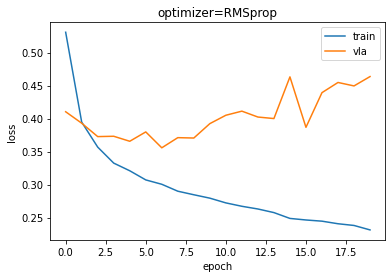

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('optimizer=RMSprop')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vla'])
plt.show()

In [ ]:
#Adam 은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조절한다 -> 과대적합을 줄일 수 있다

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

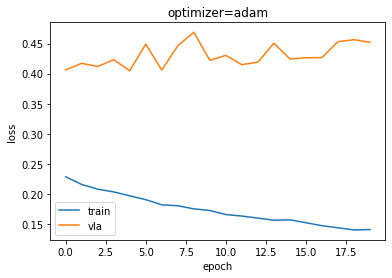

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('optimizer=adam')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vla'])
plt.show()

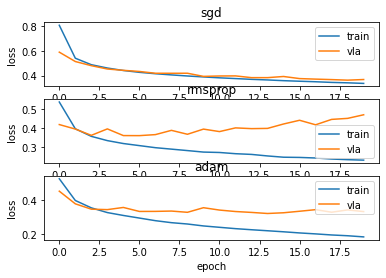

In [ ]:
fig, axes = plt.subplots(3,1)
for i, opt in enumerate(['sgd','rmsprop','adam']):
  model = model_fn2()
  model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

  axes[i].plot(history.history['loss'])
  axes[i].plot(history.history['val_loss'])
  axes[i].set_title(opt)
  axes[i].set_xlabel('epoch')
  axes[i].set_ylabel('loss')
  axes[i].legend(['train','vla'])

In [ ]:
optimizers = ['sgd','rmsprop','adam']
models, histories = [], []
for i, opt in enumerate(optimizers):
  models.append(model_fn2())
  models[i].compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  histories.append(models[i].fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val)))

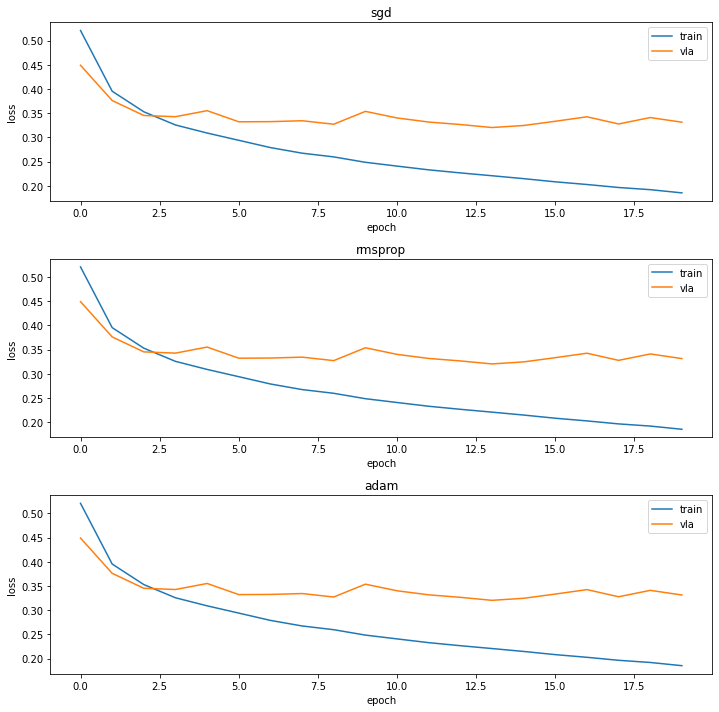

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
for i, opt in enumerate(['sgd','rmsprop','adam']):
  axes[i].plot(history.history['loss'])
  axes[i].plot(history.history['val_loss'])
  axes[i].set_title(opt)
  axes[i].set_xlabel('epoch')
  axes[i].set_ylabel('loss')
  axes[i].legend(['train','vla'])
fig.tight_layout()
plt.show()

# 드롭아웃
훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(=뉴런의 출력을 0으로 만들어) 과대적합을 막는다.

In [ ]:
model.summary() # 현재 상태

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = model_fn2(keras.layers.Dropout(0.3)) # 30%를 랜덤하게 꺼서 overfit 낮추기, 일반화 높이기
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


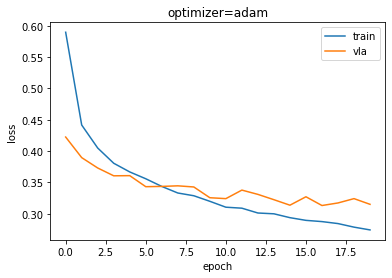

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('optimizer=adam')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vla'])
plt.show()

# 위의 그래프보다 낮아진 것을 알 수 있다

In [ ]:
models, histories = [], []
rates = np.arange(0.0, 0.5, 0.1)
for rate in rates:
  model = model_fn2(keras.layers.Dropout(rate))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))
  models.append(model)
  histories.append(history)

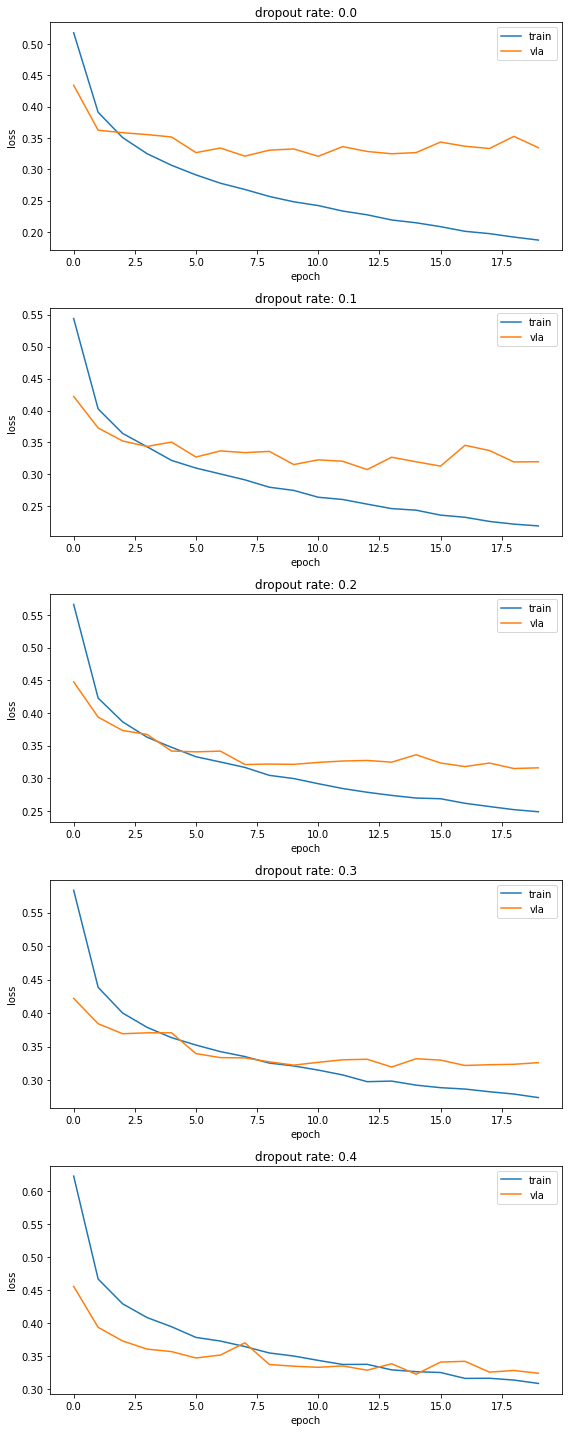

In [ ]:
fig, axes = plt.subplots(rates.size, 1, figsize=(8,20))
for i, ax in enumerate(axes):
  ax.plot(histories[i].history['loss'])
  ax.plot(histories[i].history['val_loss'])
  ax.set_title(f"dropout rate: {rates[i]:.1f}")
  ax.set_xlabel('epoch')
  ax.set_ylabel('loss')
  ax.legend(['train','vla'])
fig.tight_layout()
plt.show()

#모델 저장과 복원
나중에 참조해서 쓰기 위해 담아둬야 함  
메모리에 저장하는게 아니라 파일로 저장하고 싶다면?! -> USB에 저장 등

In [ ]:
model.layers

In [ ]:
# dropout
model.layers[2]

In [ ]:
#?keras.layers.Dropout

In [ ]:
model.save_weights('model-weights.h5') # 학습된 파라미터를 저장 - load_weights와 한 쌍
model.save('model-whole.h5') # 학습된 모델을 저장 (파라미터 X)

# HDFS 파일 포맷

In [ ]:
model.save_weights('model-drop-0_3-weights.h5')

In [ ]:
#저장할때 썼던 모델이 아님 -> 구조가 다름 = 파라미터 개수가 일치하지 않음
model = model_fn2()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

In [ ]:
model.load_weights('model-drop-0_3-weights.h5')

In [ ]:
model.summary()

#79,510로 서로 동일함 - 잘 돌아감

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = model_fn2(keras.layers.Dense(10, activation="relu"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

In [ ]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 output (Dense)              (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.load_weights('model-drop-0_3-weights.h5')
# 오류!! Layer count mismatch when loading weights from file. Model expected 3 layers, found 2 saved layers.

#dropout은 파라미터 영향이 없으므로 잘 로드 되었지만
#한 층을 더 넣는 것은 영향이 있으므로 로드되지 않음

# 모델 자체를 저장해 보기로

In [ ]:
model.save('model-hidden-2.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 333520 Apr  1 06:01 model-drop-0_3-weights.h5
-rw-r--r-- 1 root root 988536 Apr  1 06:04 model-hidden-2.h5
-rw-r--r-- 1 root root 333520 Apr  1 06:01 model-weights.h5
-rw-r--r-- 1 root root 982664 Apr  1 06:01 model-whole.h5


In [ ]:
new_model = keras.models.load_model('model-hidden-2.h5') #load_weight  쓸 수 없음
new_model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 output (Dense)              (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_test_scaled = X_test/255.0

In [ ]:
X_test_scaled.shape

(10000, 28, 28)

In [ ]:
new_model.predict(X_test_scaled[0:1])

array([[5.5022292e-07, 1.9640329e-11, 5.0225375e-09, 5.6340969e-07,
        2.9954362e-16, 2.5677080e-06, 4.1348305e-10, 8.4026181e-04,
        3.2680514e-10, 9.9915600e-01]], dtype=float32)

In [ ]:
y_test_pred_proba = new_model.predict(X_test_scaled)
y_test_pred_proba.shape

(10000, 10)

In [ ]:
np.argmax(y_test_pred_proba, axis=1).shape # 확률의 가장 큰 클래스의 인덱스 도출

(10000,)

In [ ]:
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
np.sum(y_test_pred == y_test) # 맞힌 갯수

8804

In [ ]:
np.mean(y_test_pred == y_test) # 정확도 (true=1)

0.8804

In [ ]:
model.evaluate(X_test_scaled, y_test) # accuracy: 0.8737 로 동일하다
# 이미 결과값을 알고 있는 상태이므로 처음부터 predict 돌리지 않아도 된다

313/313 [==============================] - 1s 3ms/step - loss: 0.3881 - accuracy: 0.8804


[0.38810452818870544, 0.8804000020027161]

# 콜백(callback)
dropout과 더불어서 overfit를 방지하는 기능  
에포크가 진행되면서 손실값이 점점 낮아져야 하지만, 낮아지지 않는다면 - 학습 종료 필요  
-> 2단계 전으로 이동해서 베스트 핏을 저장한다(조기종료 시에 저장되도록 설정되어 있음)    

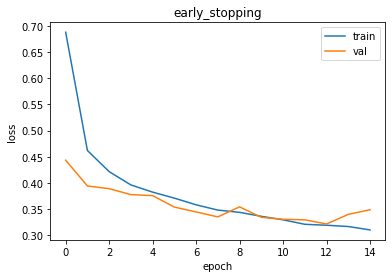

In [ ]:
model = model_fn2(keras.layers.Dropout(0.3), keras.layers.Dense(10, activation="relu"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
checkpoint = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val), callbacks=[checkpoint, early_stopping])
#model = keras.models.load_model('best-model.h5')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('early_stopping')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
early_stopping_cb.stopped_epoch

2